In [1]:
%load_ext Cython
%matplotlib inline

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

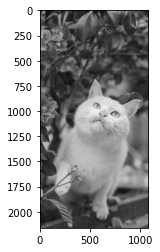

In [22]:
%%cython -a
import cython
import os, shutil

import itertools as it

import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt

cdef str img_path = './samples/white_cat.jpg'
cdef str dir_path = './results'

cdef void clear_dir(str dir_path):
    cdef str filename
    print('me')
    for filename in os.listdir(dir_path):
        print(type(filename))
        file_path = os.path.join(dir_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
            print("Done clearing.")
        except Exception as e:
            print('Failed to delete %s. Reason %s' % (file_path, e))
                        
def read_gray(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

cdef decompose(unsigned char[:, :] img):
    cdef int i
    for i in range(0, 255):
        binary = cv.threshold(np.float32(img), i, 255, cv.THRESH_BINARY)
        ret, field = binary
        cv.imwrite(f'./results/decomposition/threshat{i}.jpg', np.float32(field))

# def combine(dir_path):
#     temp = None
#     for filename in os.listdir(dir_path):
#         filepath = f'{dir_path}/{filename}'
#         if temp != None:
#             img = cv.imread(filepath)
#             temp = cv.add(temp, filepath)
#         else:
#             temp = cv.imread(filepath)
        
def check():
    #clear_dir(dir_path)
    cdef unsigned char[:, :] field = read_gray(img_path)
    #decompose(field)
    plt.imshow(field, cmap='gray')
    combine('./results/decomposition')
    

check()
    
# cdef list ruleset = list(it.product([0, 255], repeat=9))
# cdef int i = 0
# for i of 
# ca = CellularAutomata(field, ruleset[32], )
# ca.run()
# save(ca.field, f'./results/result.jpg')

In [9]:



cdef save(img, path):
    cv.imwrite(path, np.float32(img))

cdef class CellularAutomata:
    cdef int maxX, maxY
    cdef unsigned char [:, :] field
    cdef tuple rule

    def __init__(self, field, rule):
        self.maxX = len(field)
        self.maxY = len(field[0])
        self.field = field
        self.rule = rule

    def tick(self):
        new_field = self.tickAlgorithm()
        self.field = new_field
    
    cpdef unsigned char [:, :] tickAlgorithm(self):
        cdef unsigned char [:, :] field2 = self.field
        cdef int y, x
        for y in range(0, self.maxY):
            for x in range(0, self.maxX):
                neighbours = tuple(self.neighbours(x, y))
                
                if neighbours == self.rule:
                    field2[x][y] = 255
                    continue

                else:
                    field2[x][y]

        return field2

    def neighbours(self, x, y):
        rows = self.maxX
        cols = self.maxY if rows else 0
        for i in range(max(0, x - 1), min(rows, x + 2)):
            for j in range(max(0, y - 1), min(cols, y + 2)):
                yield self.field[i][j]

    def run(self):
        self.tick()

SyntaxError: invalid syntax (<ipython-input-9-eff293448d56>, line 1)